In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# Import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | sherbakul
Processing Record 3 of Set 1 | zhezkazgan
Processing Record 4 of Set 1 | hambantota
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | ondjiva
Processing Record 8 of Set 1 | riyadh
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ratnapura
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | castelo do piaui
Processing Record 19 of Set 1 | nishihara
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | jalu
Processing Record 22 of Set 1 | loandjili
Processing Record 23 of Set 1

Processing Record 41 of Set 4 | kozhevnikovo
Processing Record 42 of Set 4 | charleston
Processing Record 43 of Set 4 | bambanglipuro
Processing Record 44 of Set 4 | ganzhou
Processing Record 45 of Set 4 | korla
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | yenangyaung
Processing Record 48 of Set 4 | bilibino
Processing Record 49 of Set 4 | guarapuava
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | lanzhot
Processing Record 2 of Set 5 | praia
Processing Record 3 of Set 5 | jalalabad
Processing Record 4 of Set 5 | oktyabrskiy
Processing Record 5 of Set 5 | atuona
Processing Record 6 of Set 5 | egvekinot
Processing Record 7 of Set 5 | puerto escondido
Processing Record 8 of Set 5 | fairbanks
Processing Record 9 of Set 5 | vila velha
Processing Record 10 of Set 5 | alugan
Processing Record 11 of Set 5 | kodiak
Processing Record 12 of Set 5 | hasaki
Processing Record 13 of Set 5 | rio gallegos
Processing Record 14 of Set 5 | tuatapere


Processing Record 31 of Set 8 | vila do maio
Processing Record 32 of Set 8 | khasan
Processing Record 33 of Set 8 | molde
Processing Record 34 of Set 8 | fare
Processing Record 35 of Set 8 | itarema
Processing Record 36 of Set 8 | tarudant
City not found. Skipping...
Processing Record 37 of Set 8 | camara de lobos
Processing Record 38 of Set 8 | pangkalanbuun
Processing Record 39 of Set 8 | tiznit
Processing Record 40 of Set 8 | tahta
Processing Record 41 of Set 8 | abu dhabi
Processing Record 42 of Set 8 | broome
Processing Record 43 of Set 8 | french harbor
Processing Record 44 of Set 8 | moose factory
Processing Record 45 of Set 8 | marfino
Processing Record 46 of Set 8 | udachnyy
Processing Record 47 of Set 8 | shiyan
Processing Record 48 of Set 8 | makakilo city
Processing Record 49 of Set 8 | erenhot
Processing Record 50 of Set 8 | whitehorse
Processing Record 1 of Set 9 | dickinson
Processing Record 2 of Set 9 | rio viejo
Processing Record 3 of Set 9 | huanren
Processing Record 

Processing Record 14 of Set 12 | moa
Processing Record 15 of Set 12 | mrirt
City not found. Skipping...
Processing Record 16 of Set 12 | jiangyou
Processing Record 17 of Set 12 | karagaylinskiy
Processing Record 18 of Set 12 | ende
Processing Record 19 of Set 12 | madang
Processing Record 20 of Set 12 | rungata
City not found. Skipping...
Processing Record 21 of Set 12 | tecoanapa
Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | gisborne
Processing Record 24 of Set 12 | longyearbyen
Processing Record 25 of Set 12 | liverpool
Processing Record 26 of Set 12 | osoyoos
Processing Record 27 of Set 12 | shenjiamen
Processing Record 28 of Set 12 | malartic
Processing Record 29 of Set 12 | tamale
Processing Record 30 of Set 12 | hofn
Processing Record 31 of Set 12 | taltal
Processing Record 32 of Set 12 | ginda
Processing Record 33 of Set 12 | east cleveland
Processing Record 34 of Set 12 | poso
Processing Record 35 of Set 12 | andros town
Processing Record 36 of Set

In [10]:
len(city_data)

570

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,82.81,76,93,8.01,MX,2021-08-04 09:39:43
1,Sherbakul,54.6316,72.3963,74.88,42,45,12.28,RU,2021-08-04 09:39:44
2,Zhezkazgan,47.8043,67.7144,91.29,22,44,18.39,KZ,2021-08-04 09:39:44
3,Hambantota,6.1241,81.1185,93.54,59,40,19.57,LK,2021-08-04 09:39:45
4,Ushuaia,-54.8000,-68.3000,42.46,65,75,20.71,AR,2021-08-04 09:35:00
5,Yulara,-25.2406,130.9889,60.64,29,0,8.05,AU,2021-08-04 09:39:45
6,Ondjiva,-17.0667,15.7333,80.64,22,0,6.91,AO,2021-08-04 09:39:46
7,Riyadh,24.6877,46.7219,107.74,6,56,3.98,SA,2021-08-04 09:38:45
8,Dunedin,-45.8742,170.5036,44.80,71,100,25.01,NZ,2021-08-04 09:39:46
9,Hermanus,-34.4187,19.2345,59.90,77,100,4.36,ZA,2021-08-04 09:39:46


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2021-08-04 09:39:43,22.8909,-109.9124,82.81,76,93,8.01
1,Sherbakul,RU,2021-08-04 09:39:44,54.6316,72.3963,74.88,42,45,12.28
2,Zhezkazgan,KZ,2021-08-04 09:39:44,47.8043,67.7144,91.29,22,44,18.39
3,Hambantota,LK,2021-08-04 09:39:45,6.1241,81.1185,93.54,59,40,19.57
4,Ushuaia,AR,2021-08-04 09:35:00,-54.8000,-68.3000,42.46,65,75,20.71
5,Yulara,AU,2021-08-04 09:39:45,-25.2406,130.9889,60.64,29,0,8.05
6,Ondjiva,AO,2021-08-04 09:39:46,-17.0667,15.7333,80.64,22,0,6.91
7,Riyadh,SA,2021-08-04 09:38:45,24.6877,46.7219,107.74,6,56,3.98
8,Dunedin,NZ,2021-08-04 09:39:46,-45.8742,170.5036,44.80,71,100,25.01
9,Hermanus,ZA,2021-08-04 09:39:46,-34.4187,19.2345,59.90,77,100,4.36


In [1]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

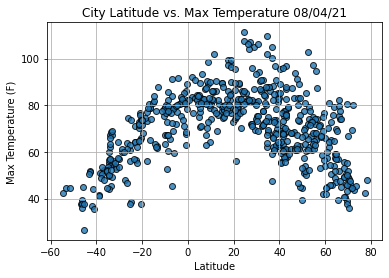

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

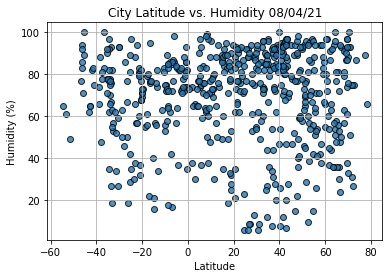

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

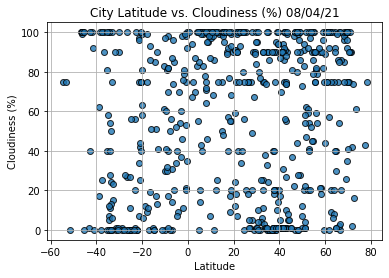

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

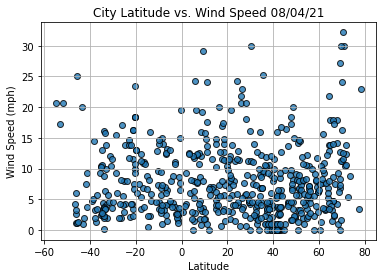

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City               Severo-Kurilsk
Country                        RU
Date          2021-08-04 09:39:48
Lat                       50.6789
Lng                       156.125
Max Temp                    50.81
Humidity                       73
Cloudiness                     91
Wind Speed                  14.23
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2021-08-04 09:39:43,22.8909,-109.9124,82.81,76,93,8.01
1,Sherbakul,RU,2021-08-04 09:39:44,54.6316,72.3963,74.88,42,45,12.28
2,Zhezkazgan,KZ,2021-08-04 09:39:44,47.8043,67.7144,91.29,22,44,18.39
3,Hambantota,LK,2021-08-04 09:39:45,6.1241,81.1185,93.54,59,40,19.57
7,Riyadh,SA,2021-08-04 09:38:45,24.6877,46.7219,107.74,6,56,3.98


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

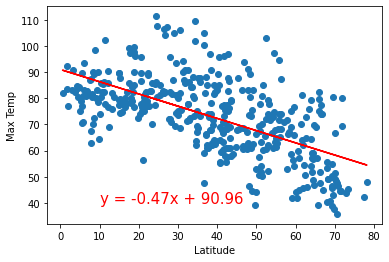

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

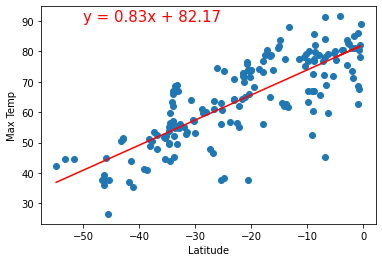

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

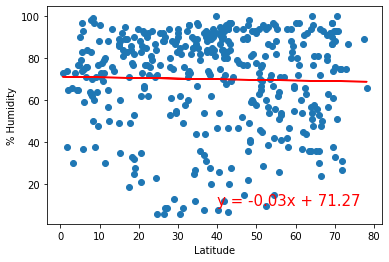

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

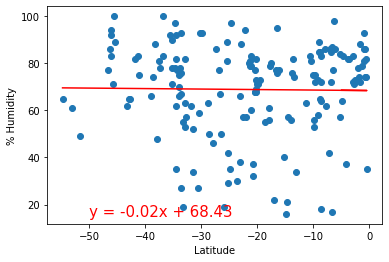

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

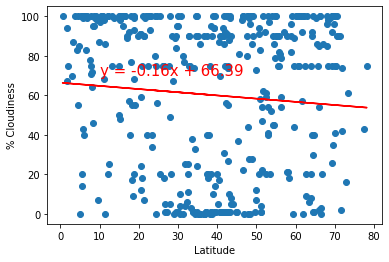

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,70))

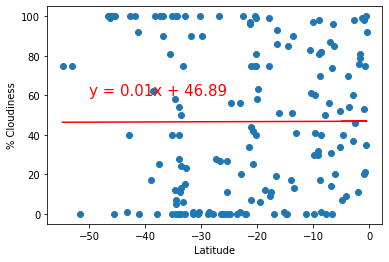

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

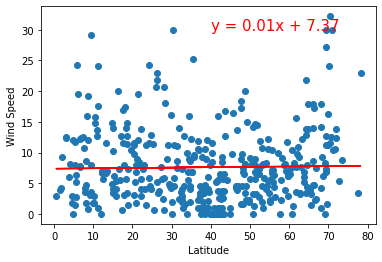

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

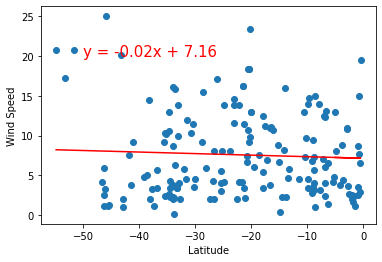

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))